In [58]:
# Importing all libraries required
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [59]:
data = pd.read_csv("Reduced_Train.csv")

In [60]:
# Drop the 'ID' column
df = data.drop(columns=['ID'])

# Drop rows with null values
df = df.dropna()


In [61]:
from sklearn.preprocessing import LabelEncoder

# OneHot Encoding for 'Warehouse_block', 'Mode_of_Shipment', and 'Gender'
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender'], drop_first=True)

# Label Encoding for 'Product_importance'
label_encoder = LabelEncoder()
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])


In [62]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting data into features (X) and target (y)
X = df.drop(columns=['Reached.on.Time_Y.N'])  # Features
y = df['Reached.on.Time_Y.N']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=2: {accuracy:.2f}")




Accuracy with k=2: 0.60


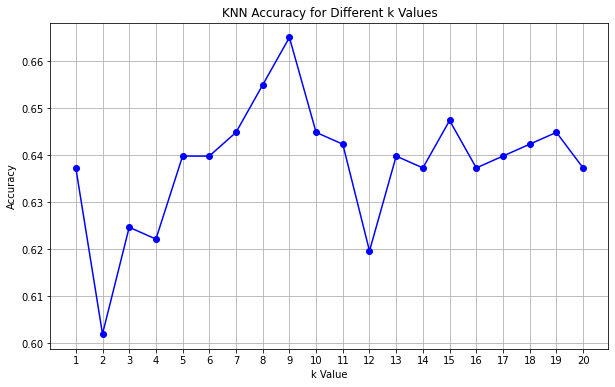

In [63]:
# Plot accuracy for different k values
accuracies = []
k_values = range(1, 21) 
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='s', linestyle='-', color='r')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

K=9 is the best model with an accuracy of 68%

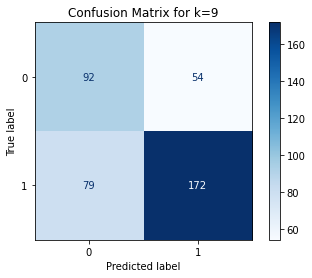

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix for k=9")
plt.show()
